# Edge dislocation:

This is a simple model for an edge dislocation, derived within Segall's Earthquake and Volcano Deformation book.  The coordinate system is defined as:

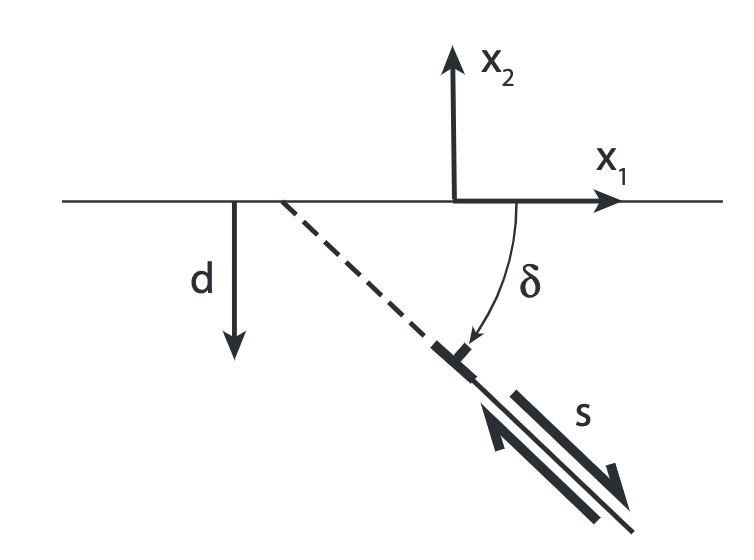

In this case, the surface displacements are defined as:



Where:





![image.png](img/edge_displacements.png)

Where:

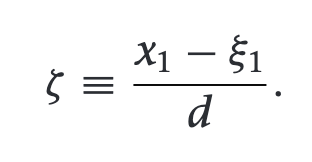